In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("Aviation_KPIs_Dataset.xlsx - Sheet1.csv")
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [3]:
# data cleaning 
# firstlty understand the about the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [5]:
df.shape

(200000, 18)

In [6]:
# checking the null value 
df.isnull().sum()

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

In [7]:
# check the duplicated values
df.duplicated().sum()

0

In [8]:
# all columns 
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

In [9]:
# check the datatypes of the columns
df.dtypes

Flight Number                        object
Scheduled Departure Time             object
Actual Departure Time                object
Delay (Minutes)                       int64
Aircraft Utilization (Hours/Day)    float64
Turnaround Time (Minutes)             int64
Load Factor (%)                     float64
Fleet Availability (%)              float64
Maintenance Downtime (Hours)        float64
Fuel Efficiency (ASK)               float64
Revenue (USD)                       float64
Operating Cost (USD)                float64
Net Profit Margin (%)               float64
Ancillary Revenue (USD)             float64
Debt-to-Equity Ratio                float64
Revenue per ASK                     float64
Cost per ASK                        float64
Profit (USD)                        float64
dtype: object

In [10]:
# convert the datatype of scheduled departure and arrival time into timestamp

df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Actual Departure Time']=pd.to_datetime(df['Actual Departure Time'])

In [11]:
df.dtypes

Flight Number                               object
Scheduled Departure Time            datetime64[ns]
Actual Departure Time               datetime64[ns]
Delay (Minutes)                              int64
Aircraft Utilization (Hours/Day)           float64
Turnaround Time (Minutes)                    int64
Load Factor (%)                            float64
Fleet Availability (%)                     float64
Maintenance Downtime (Hours)               float64
Fuel Efficiency (ASK)                      float64
Revenue (USD)                              float64
Operating Cost (USD)                       float64
Net Profit Margin (%)                      float64
Ancillary Revenue (USD)                    float64
Debt-to-Equity Ratio                       float64
Revenue per ASK                            float64
Cost per ASK                               float64
Profit (USD)                               float64
dtype: object

In [12]:
df.isnull().sum()

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

In [13]:
# now firstly findout the all numerical columns

In [14]:
numerical_columns=df.select_dtypes(include=np.number)
numerical_columns

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,28,14.86,38,60.12,97.56,8.44,2.16,20903.43,11668.11,24.11,856.06,0.53,9677.51,5401.90,9235.32
199996,48,8.67,34,77.77,87.05,8.13,3.26,39601.03,29873.77,7.33,1037.92,1.31,12147.56,9163.73,9727.26
199997,83,12.80,58,93.12,80.84,9.80,3.68,36100.34,16114.79,21.82,1441.99,2.69,9809.87,4379.02,19985.55
199998,55,12.53,115,99.04,85.82,6.84,4.70,8157.56,15878.50,17.93,4584.92,1.26,1735.65,3378.40,-7720.94


In [15]:
# findout the summary of the numerical columns
df.describe()

,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000,200000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2024-06-29 07:21:27.048759808,2024-06-29 08:55:04.200095232,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
min,2024-01-01 00:01:53,2024-01-01 00:03:34,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,2024-03-30 22:12:47,2024-03-30 15:40:28.249999872,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,2024-06-29 10:33:27,2024-06-28 20:10:25,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,2024-09-27 09:33:27.500000,2024-09-28 03:54:08.500000,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,2024-12-27 05:14:39,2024-12-27 05:07:36,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000
std,NaN,NaN,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784


In [16]:
# findout the outlier data points in the all numeical columns in the data 
# using the IQR method 
for  col in numerical_columns.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LL=(Q1-(1.5*IQR))
    UL=(Q3+(1.5*IQR))
    outliers=(df[col]<LL) | (df[col]>UL)
    # print(outliers)
    print(outliers.sum())

0
0
0
0
0
0
0
0
0
0
0
0
1544
1555
0


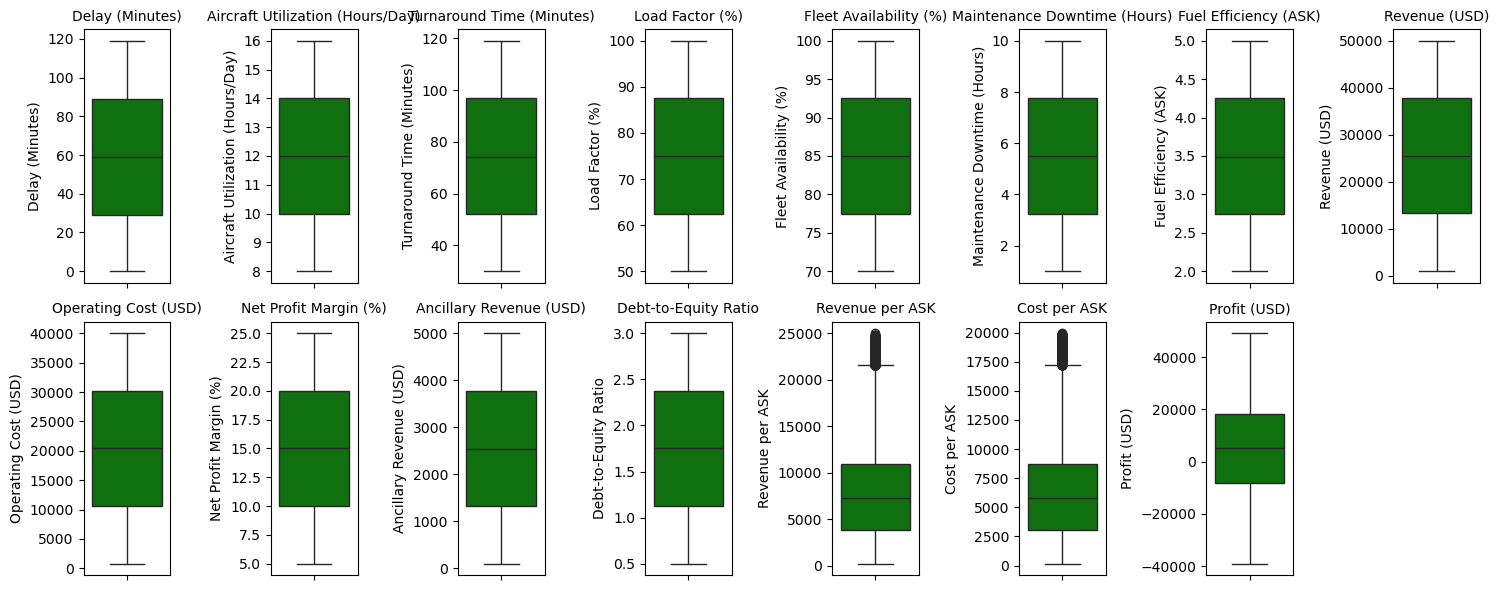

In [17]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Set up the figure with subplots in two rows
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns)//2 + len(numerical_columns)%2, figsize=(15, 6))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot box plots
for ax, col in zip(axes, numerical_columns):
    sns.boxplot(y=df[col], ax=ax,color='green')
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [18]:
# handiling the outliers by imputing the value with median value

# Assuming df is your DataFrame and numerical_columns is a list of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                # Interquartile range

    # Define lower and upper limits for outliers
    LL = Q1 - (1.5 * IQR)  # Lower limit
    UL = Q3 + (1.5 * IQR)  # Upper limit

    # Identify outliers
    outliers = (df[col] < LL) | (df[col] > UL)  # Boolean mask for outliers

    # Impute outliers with the median
    median = df[col].median()  # Calculate the median of the column
    df[col] = np.where(outliers, median, df[col]) 
    # Replace outliers with the median and not chnaged the non outlier value 
# Verify the changes
print(df.describe()) 




            Scheduled Departure Time          Actual Departure Time  \
count                         200000                         200000   
mean   2024-06-29 07:21:27.048759808  2024-06-29 08:55:04.200095232   
min              2024-01-01 00:01:53            2024-01-01 00:03:34   
25%              2024-03-30 22:12:47  2024-03-30 15:40:28.249999872   
50%              2024-06-29 10:33:27            2024-06-28 20:10:25   
75%       2024-09-27 09:33:27.500000     2024-09-28 03:54:08.500000   
max              2024-12-27 05:14:39            2024-12-27 05:07:36   
std                              NaN                            NaN   

       Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
count     200000.00000                     200000.000000   
mean          59.35885                         12.003438   
min            0.00000                          8.000000   
25%           29.00000                          9.990000   
50%           59.00000                         12.010000   


In [19]:
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

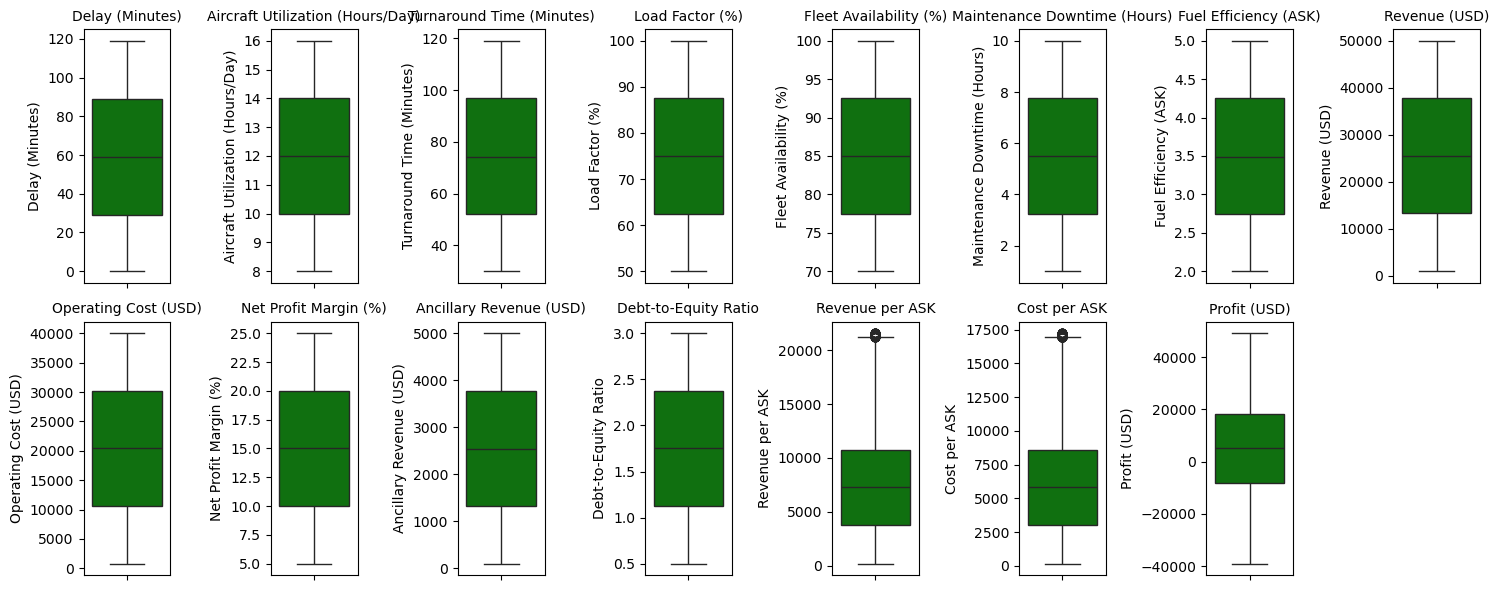

In [20]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Set up the figure with subplots in two rows
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns)//2 + len(numerical_columns)%2, figsize=(15, 6))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot box plots
for ax, col in zip(axes, numerical_columns):
    sns.boxplot(y=df[col], ax=ax,color='green')
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# data insights and visualization

In [21]:
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

In [22]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50.0,12.36,115.0,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27.0,14.53,83.0,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108.0,10.73,87.0,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64.0,15.10,99.0,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30.0,13.46,114.0,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


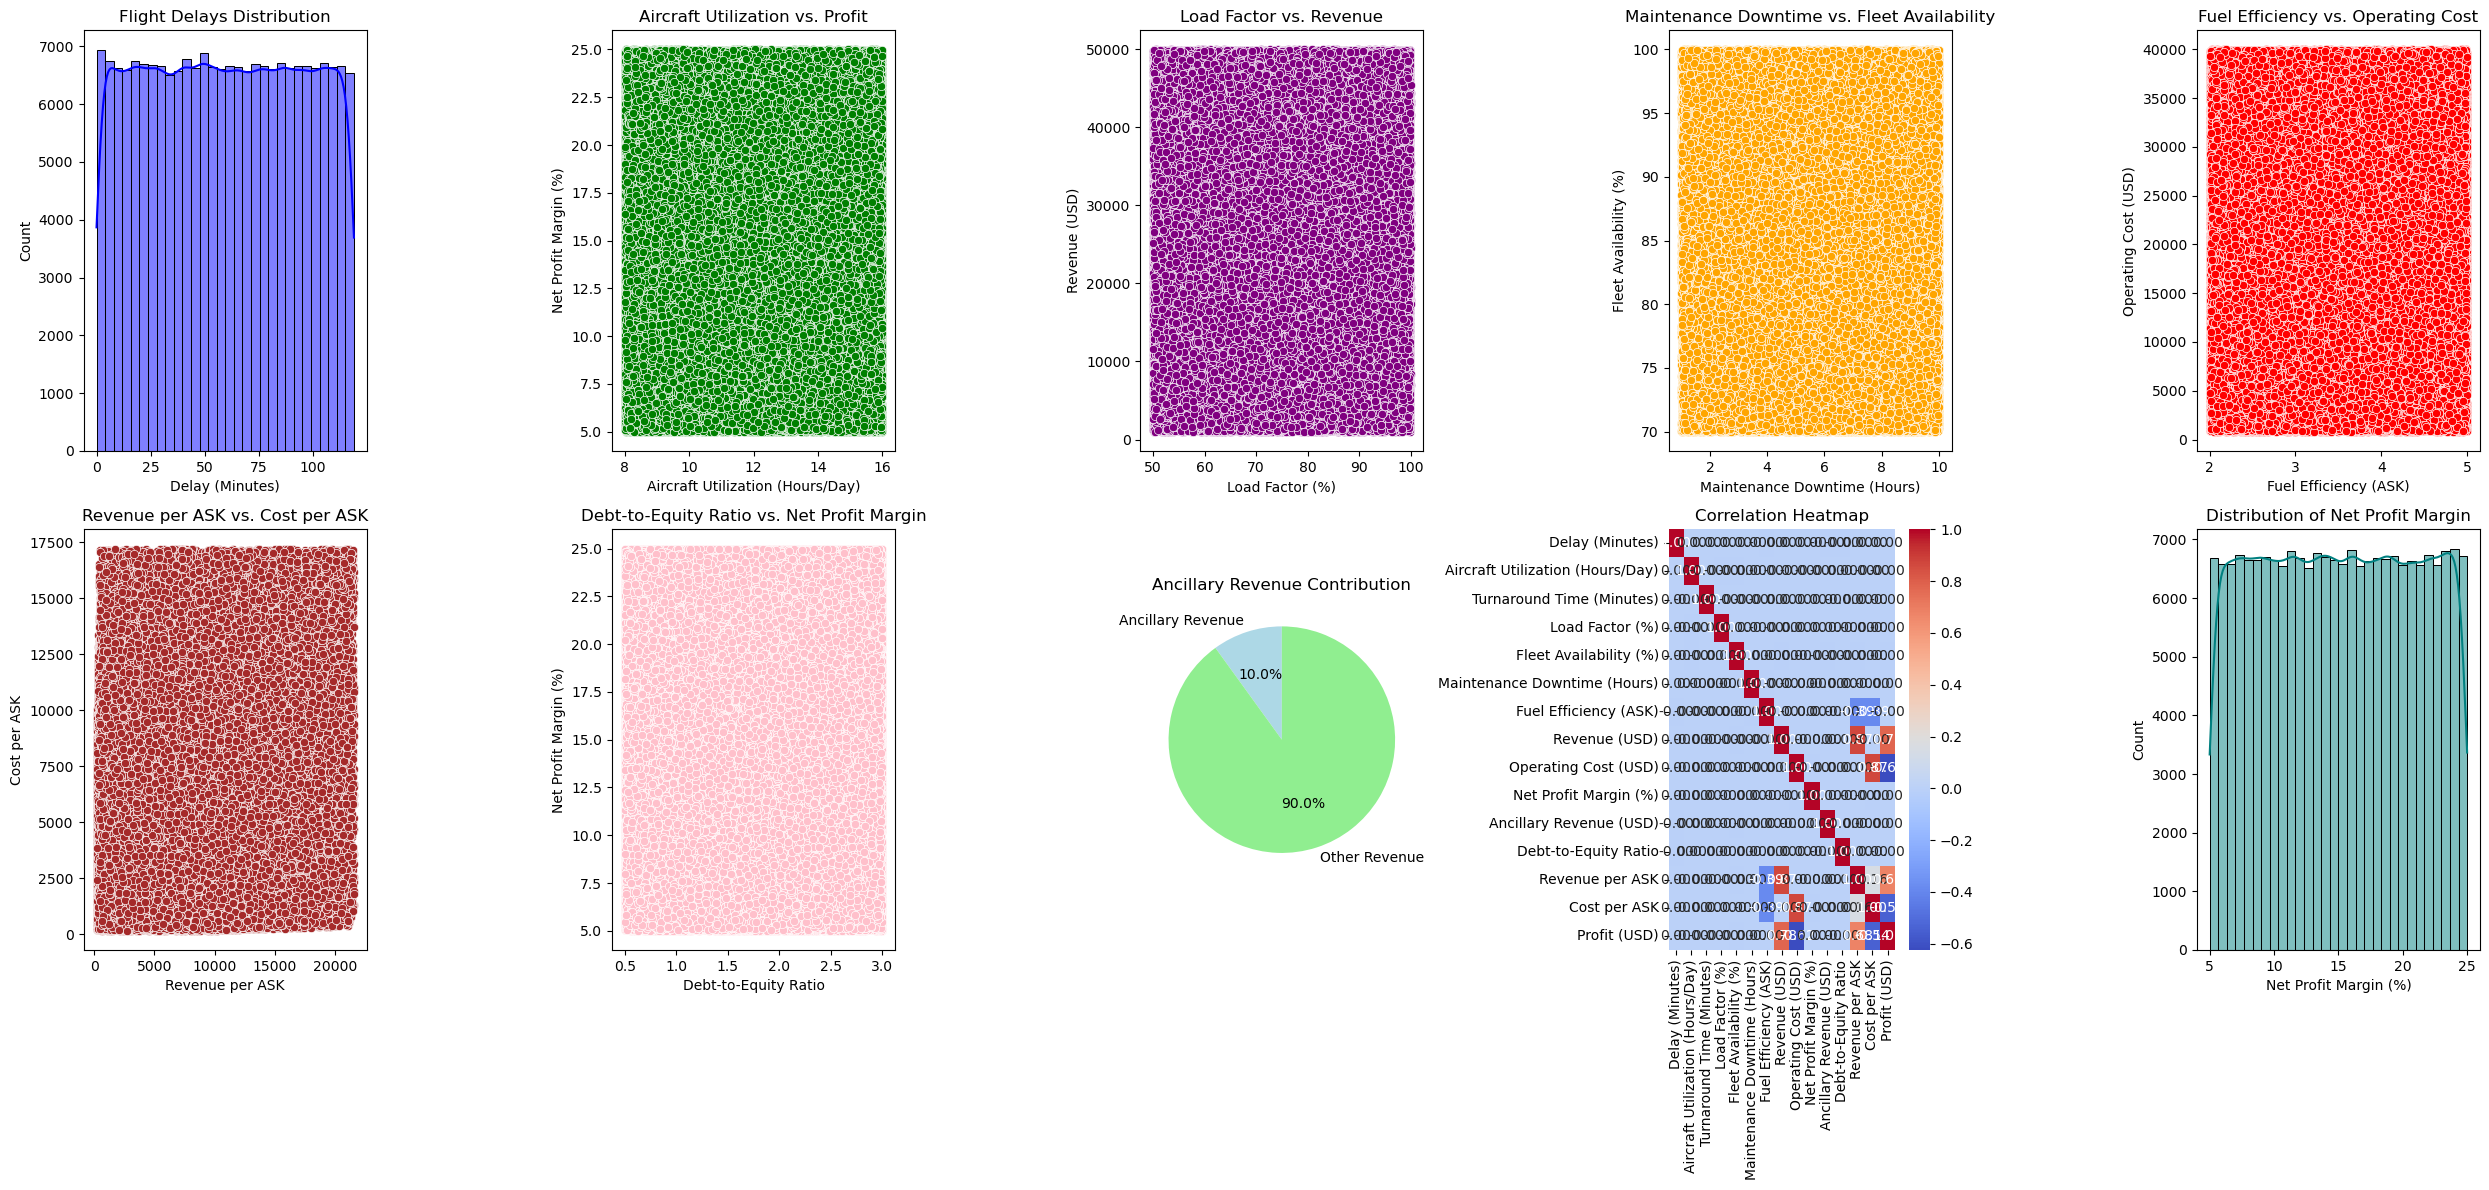

In [23]:

# Set up the figure with 2 groups (2 rows, 5 columns each)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 12))

# Group 1: Operational Performance
sns.histplot(df['Delay (Minutes)'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Flight Delays Distribution')

sns.scatterplot(x='Aircraft Utilization (Hours/Day)', y='Net Profit Margin (%)', data=df, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Aircraft Utilization vs. Profit')

sns.scatterplot(x='Load Factor (%)', y='Revenue (USD)', data=df, color='purple', ax=axes[0, 2])
axes[0, 2].set_title('Load Factor vs. Revenue')

sns.scatterplot(x='Maintenance Downtime (Hours)', y='Fleet Availability (%)', data=df, color='orange', ax=axes[0, 3])
axes[0, 3].set_title('Maintenance Downtime vs. Fleet Availability')

sns.scatterplot(x='Fuel Efficiency (ASK)', y='Operating Cost (USD)', data=df, color='red', ax=axes[0, 4])
axes[0, 4].set_title('Fuel Efficiency vs. Operating Cost')

# Group 2: Financial Performance
sns.scatterplot(x='Revenue per ASK', y='Cost per ASK', data=df, color='brown', ax=axes[1, 0])
axes[1, 0].set_title('Revenue per ASK vs. Cost per ASK')

sns.scatterplot(x='Debt-to-Equity Ratio', y='Net Profit Margin (%)', data=df, color='pink', ax=axes[1, 1])
axes[1, 1].set_title('Debt-to-Equity Ratio vs. Net Profit Margin')

# Pie Chart: Ancillary Revenue Contribution
ancillary_revenue = df['Ancillary Revenue (USD)'].sum()
total_revenue = df['Revenue (USD)'].sum()
labels = ['Ancillary Revenue', 'Other Revenue']
sizes = [ancillary_revenue, total_revenue - ancillary_revenue]
axes[1, 2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axes[1, 2].set_title('Ancillary Revenue Contribution')

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 3])
axes[1, 3].set_title('Correlation Heatmap')

sns.histplot(df['Net Profit Margin (%)'], bins=30, kde=True, color='teal', ax=axes[1, 4])
axes[1, 4].set_title('Distribution of Net Profit Margin')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Flight Delays Distribution (Histogram)

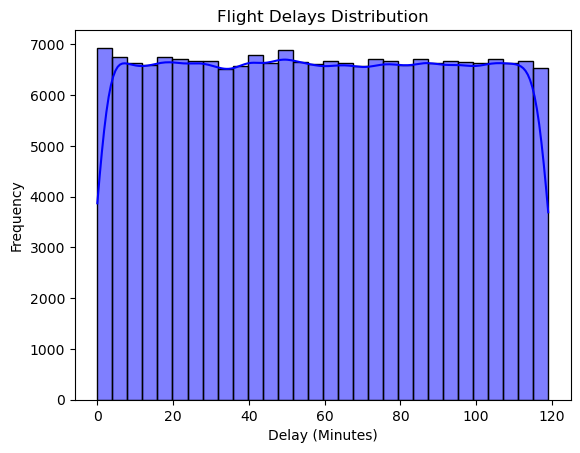

In [27]:
# Flight Delays Distribution (Histogram)
sns.histplot(df['Delay (Minutes)'], bins=30, kde=True, color='blue')
plt.title('Flight Delays Distribution')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()


# 📌 Revenue vs. Operating Cost (Scatter Plot)

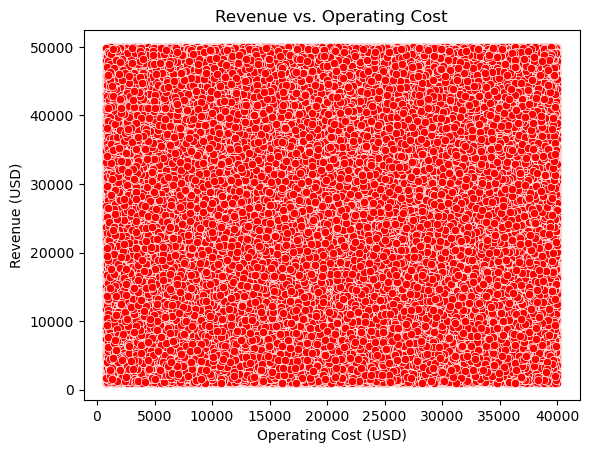

In [28]:
sns.scatterplot(x='Operating Cost (USD)', y='Revenue (USD)', data=df, color='red')
plt.title('Revenue vs. Operating Cost')
plt.xlabel('Operating Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.show()


In [29]:
df.to_csv("cleaned_data.csv",index=False)